In [6]:
from VideoLoader import VideoLoader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import torch
import numpy as np
import seaborn as sns

In [7]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 200

# Demonstrating usage of video loader and human detector

In [80]:
loader = VideoLoader()
video,fps = loader.load_video_for_classification('theatre.mp4')

In [81]:
batch_size = 5
n_frames_skip = round(fps/5)
print(n_frames_skip)

6


In [78]:
fps/5

5.9940059940059935

In [82]:
from ModelInference import ModelInference
m = ModelInference(batch_size=5,n_frames_skip=n_frames_skip,reset_buffer_every_n_batches=3)

In [64]:
video[None, ...].shape

torch.Size([1, 3, 3343, 172, 172])

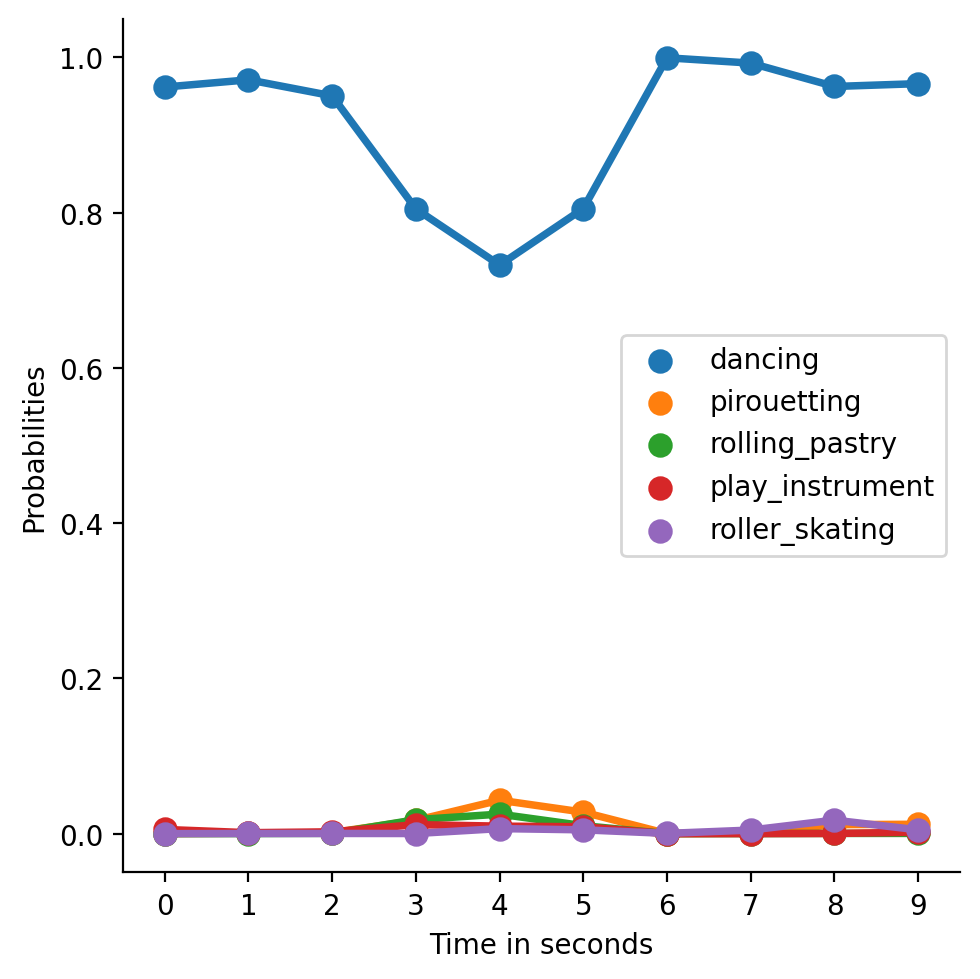

In [83]:
df_out = m.analyse_vid(video, fps, return_df=True, show_plot=True)


In [66]:
df_out

,index,cols,Probabilities
0,0,changing_oil,0.000004
1,1,changing_oil,0.000024
2,2,changing_oil,0.000080
3,3,changing_oil,0.000317
4,4,changing_oil,0.000970
...,...,...,...
550,106,driving_car,0.016400
551,107,driving_car,0.011357
552,108,driving_car,0.008273
553,109,driving_car,0.006102


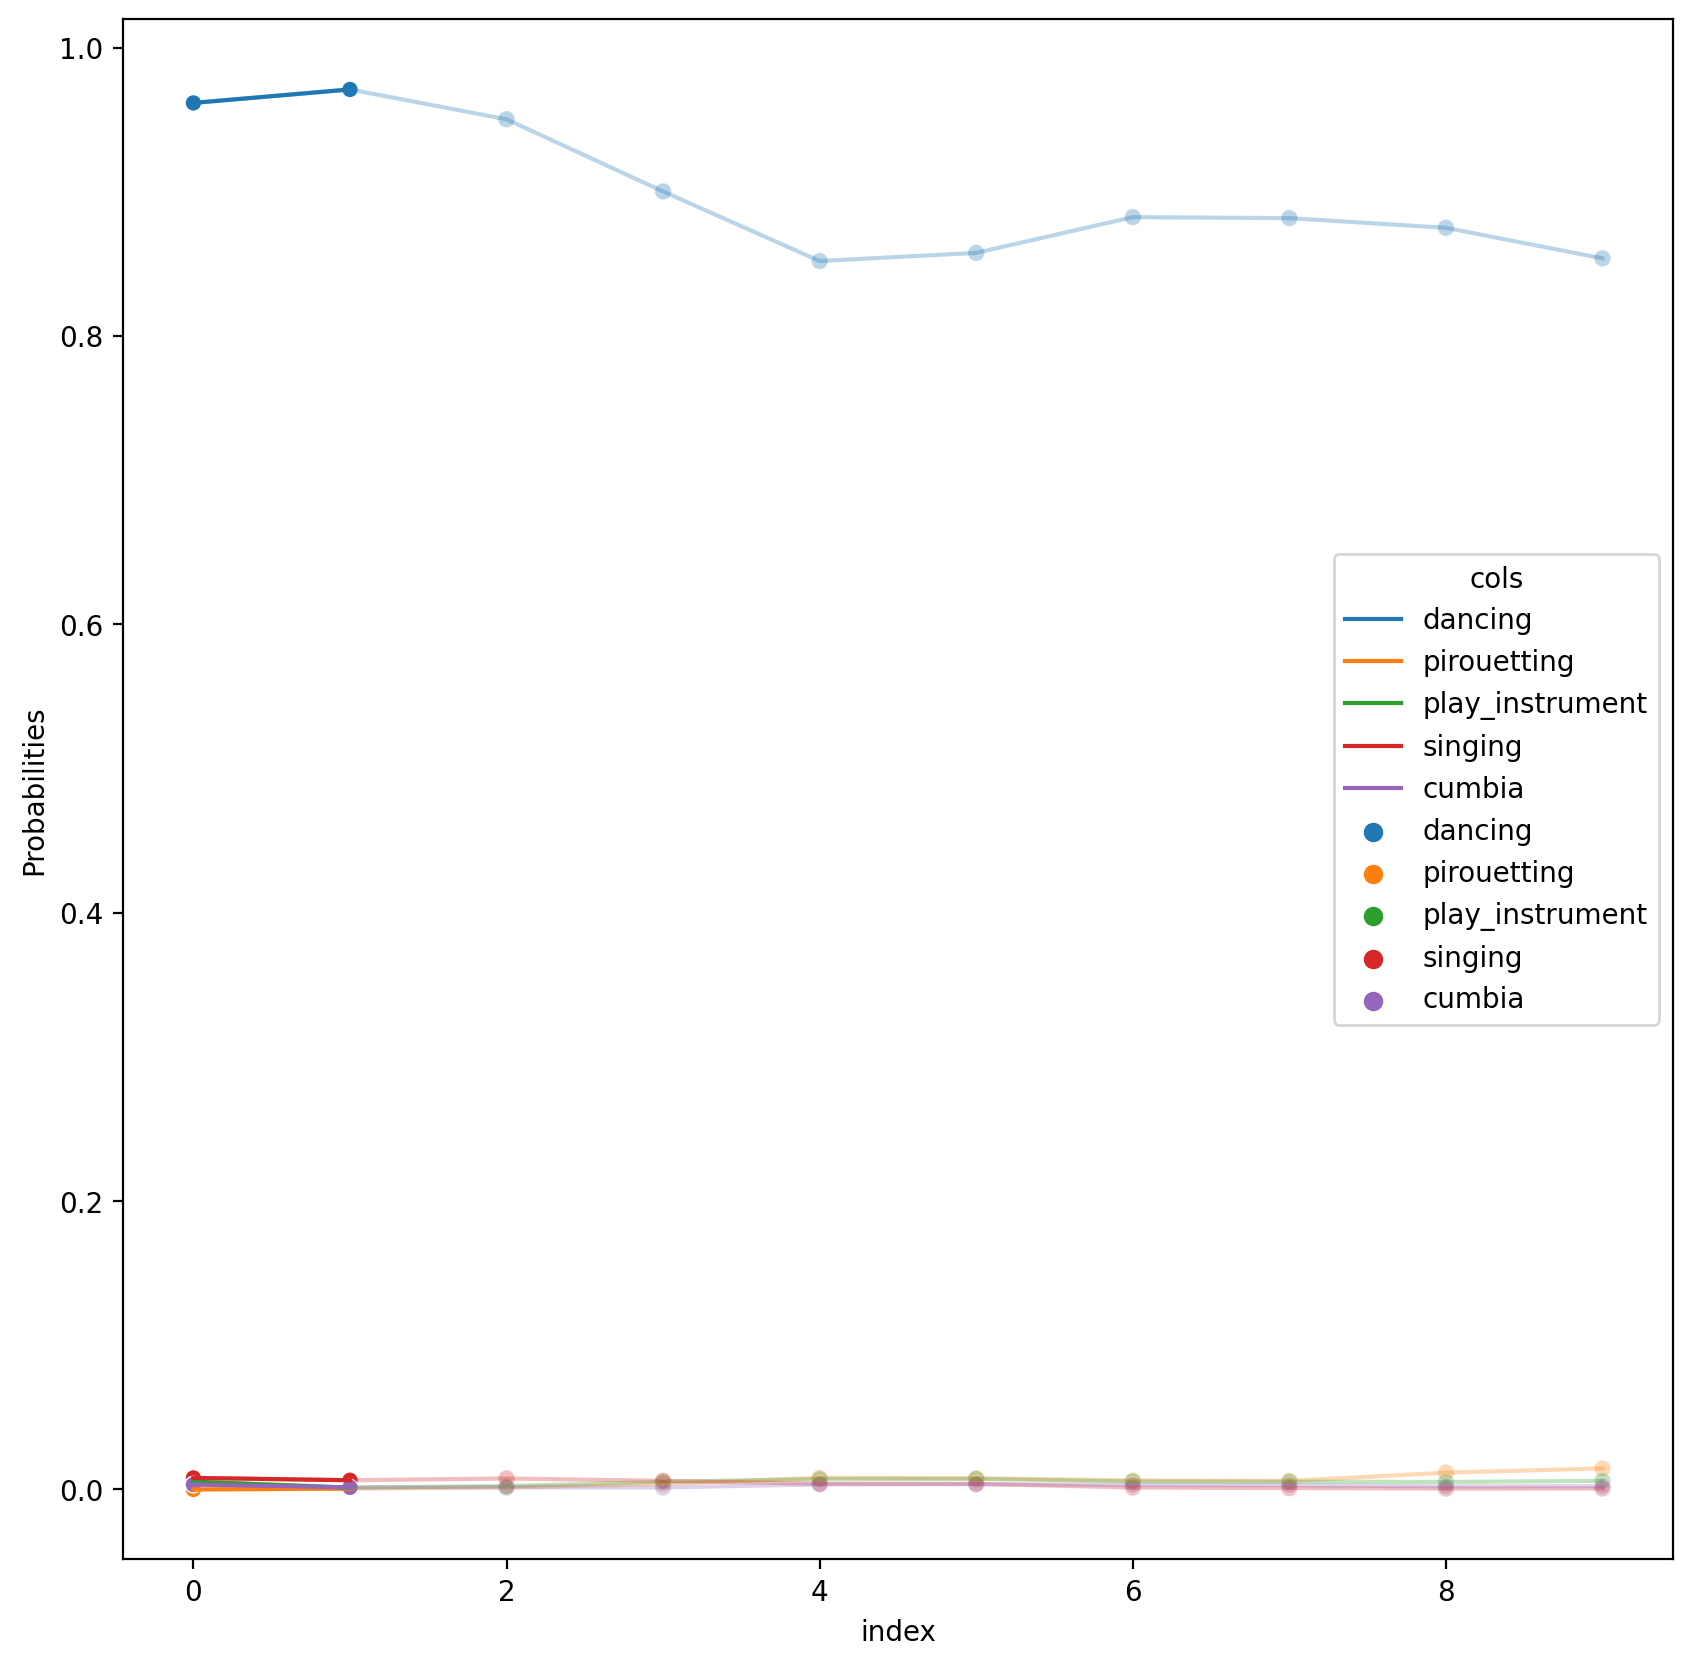

In [55]:
fig, ax = plt.subplots()
sns.lineplot(x='index',y="Probabilities",ax=ax, hue='cols', data=df_out,alpha=0.3)
sns.scatterplot(x='index',y="Probabilities",ax=ax, hue='cols', data=df_out,alpha=0.3)

for time in range(1,df_out['index'].max()+1):
    temp_df = df_out[df_out['index']<=time]
    sns.lineplot(x='index',y="Probabilities",ax=ax, hue='cols', data=temp_df,legend=False)
    sns.scatterplot(x='index',y="Probabilities",ax=ax, hue='cols', data=temp_df,legend=False)
    plt.show()


AttributeError: 'FacetGrid' object has no attribute 'catplot'

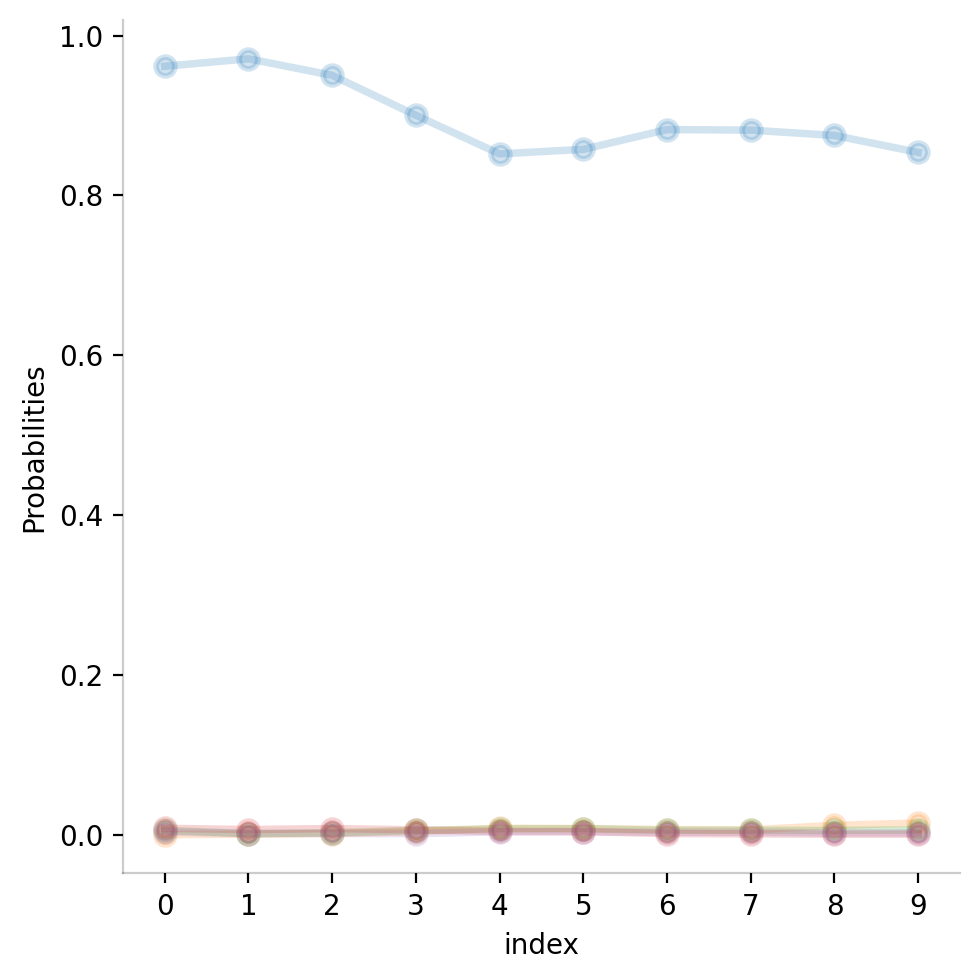

In [40]:
g = sns.catplot(x="index", y="Probabilities", hue='cols', data=df_out, kind='point',legend=False)
#plt.setp(g.collections, alpha=.3) #for the markers
plt.setp([g.ax.get_children()[0],g.ax.get_children()],alpha=.2)


sns.catplot(x="index", y="Probabilities",ax=g ,hue='cols', data=df_out[df_out['index']<5], kind='point',legend=False)
plt.show()


c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


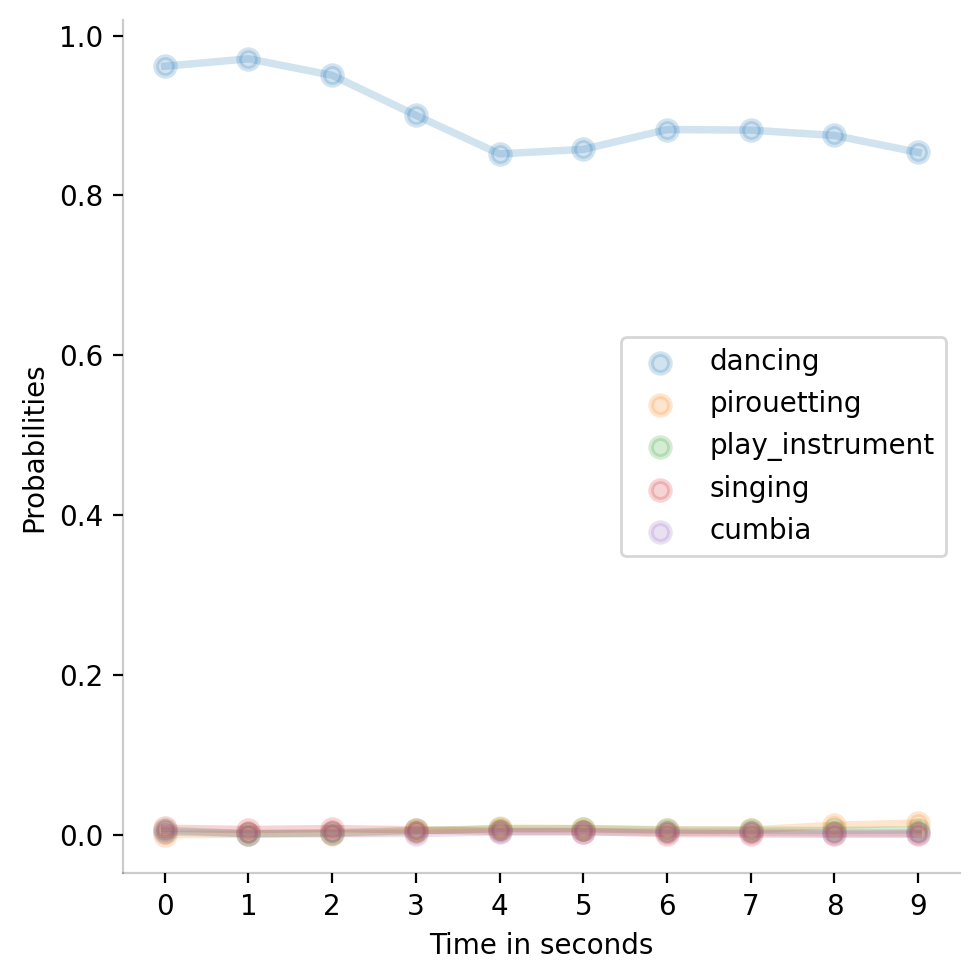

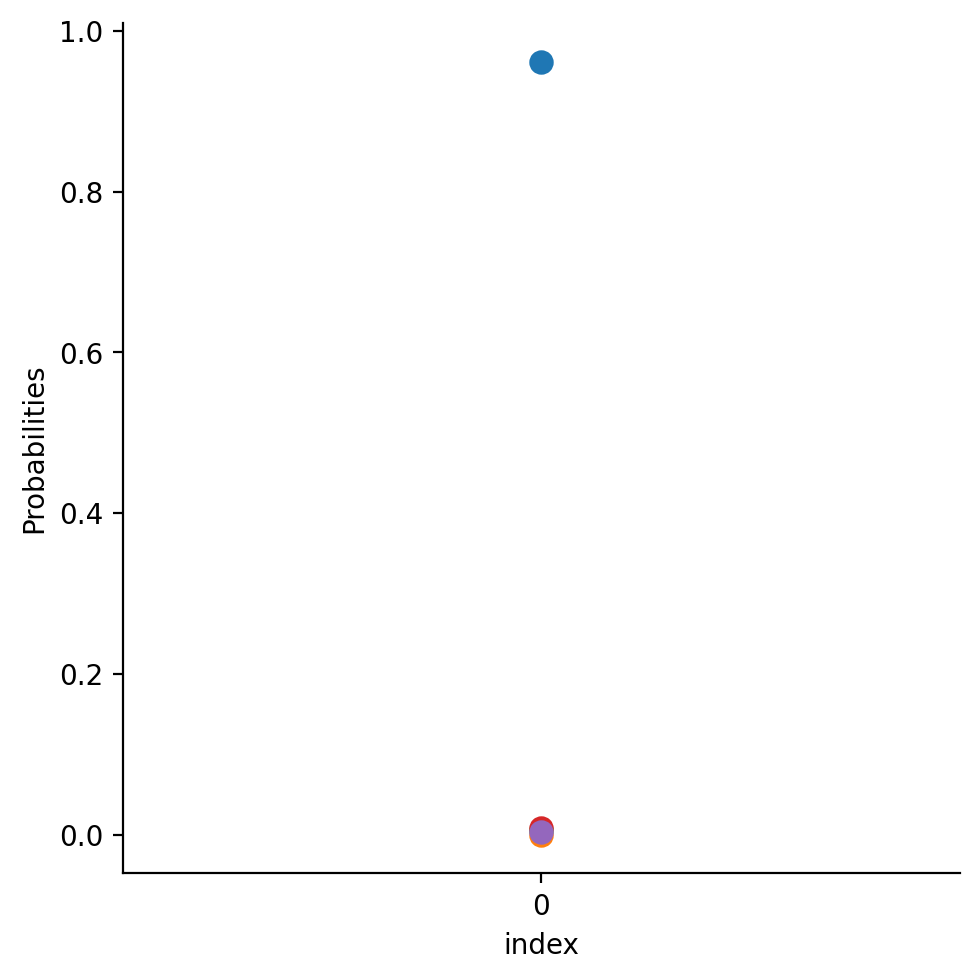

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


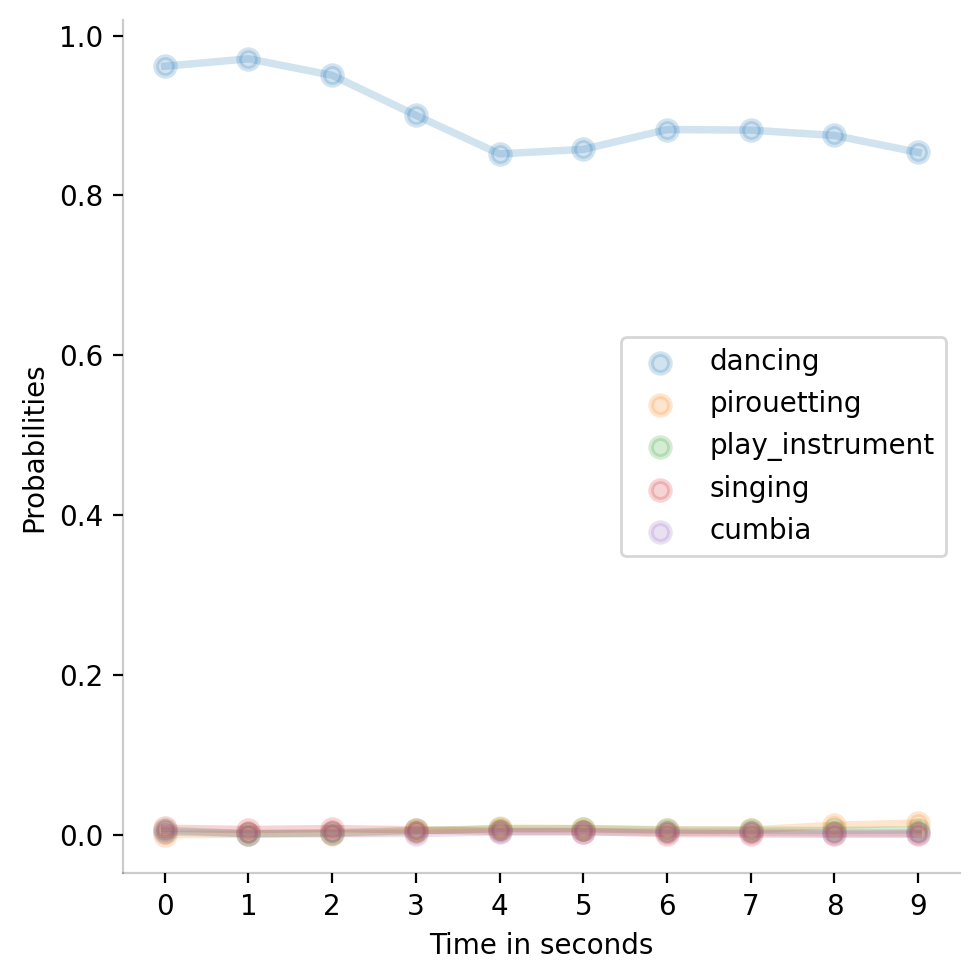

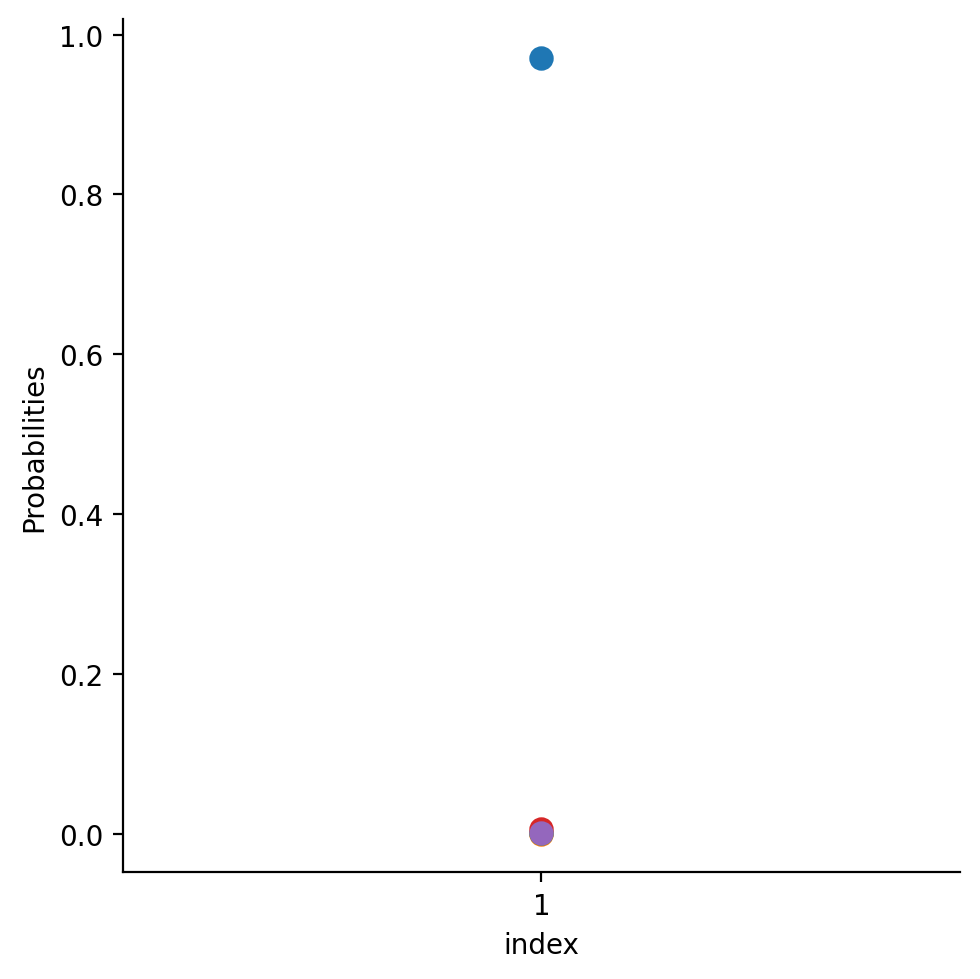

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


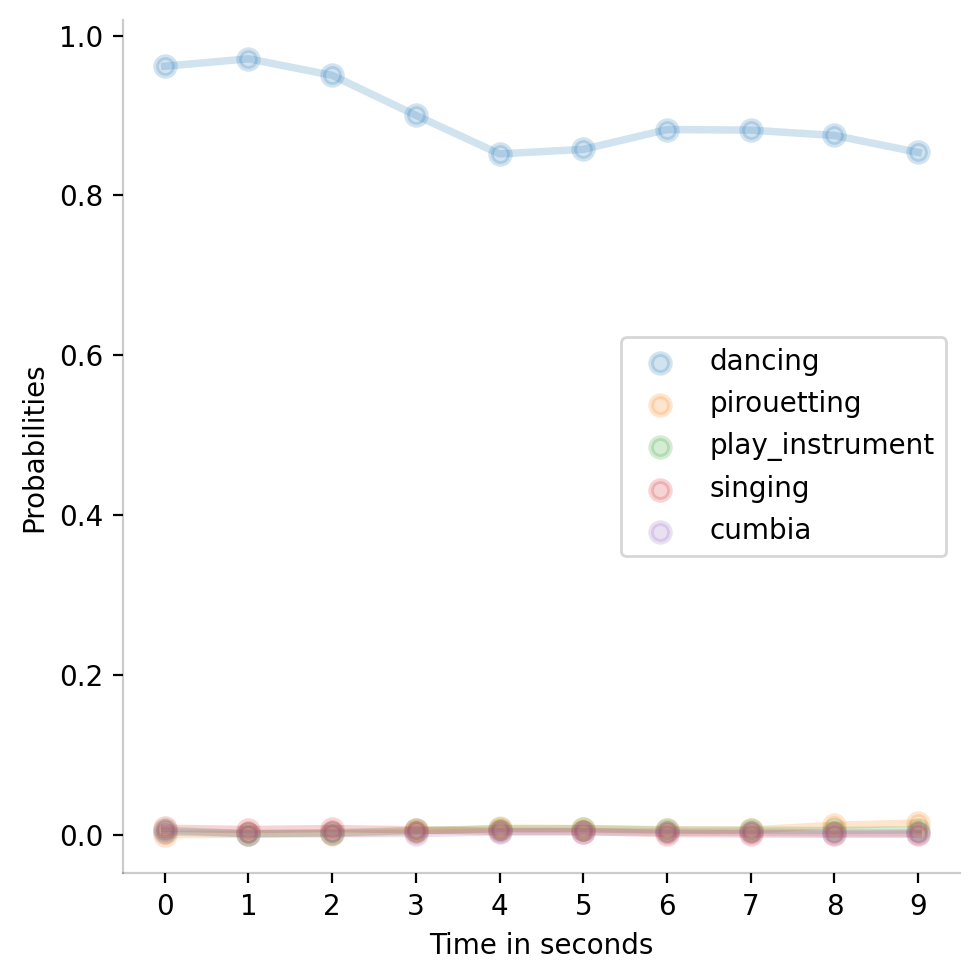

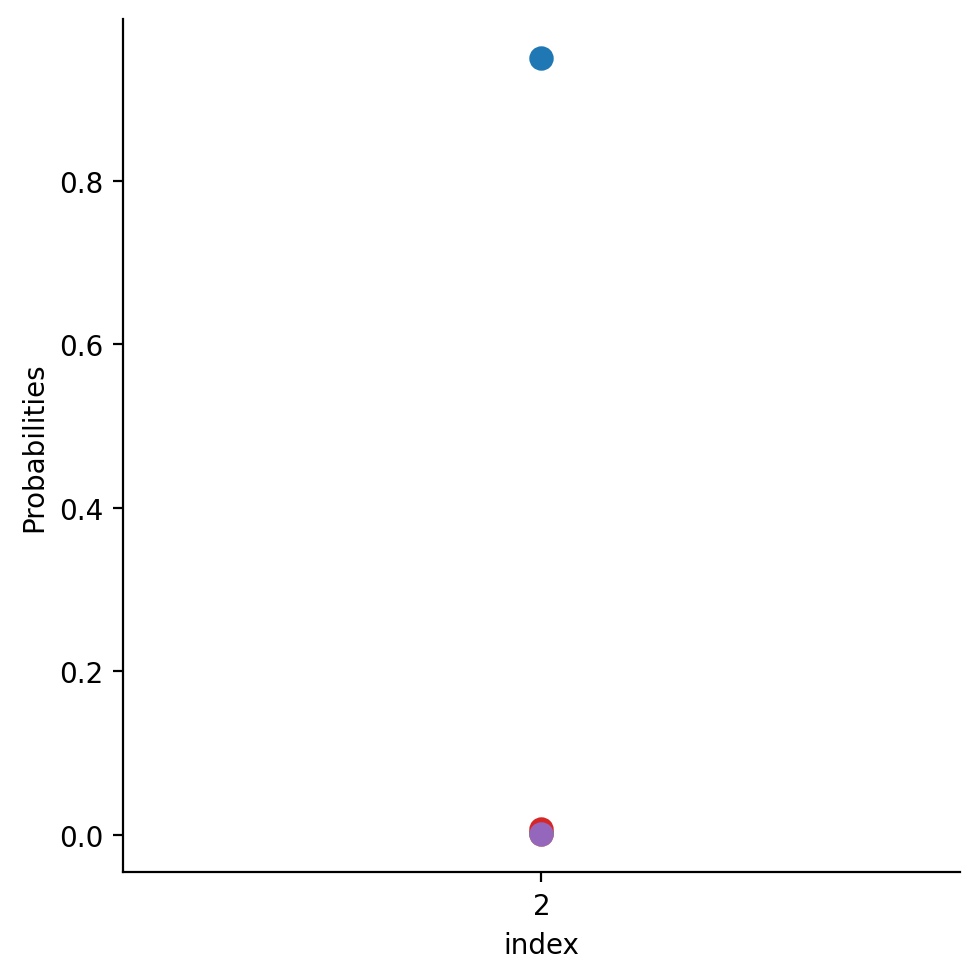

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


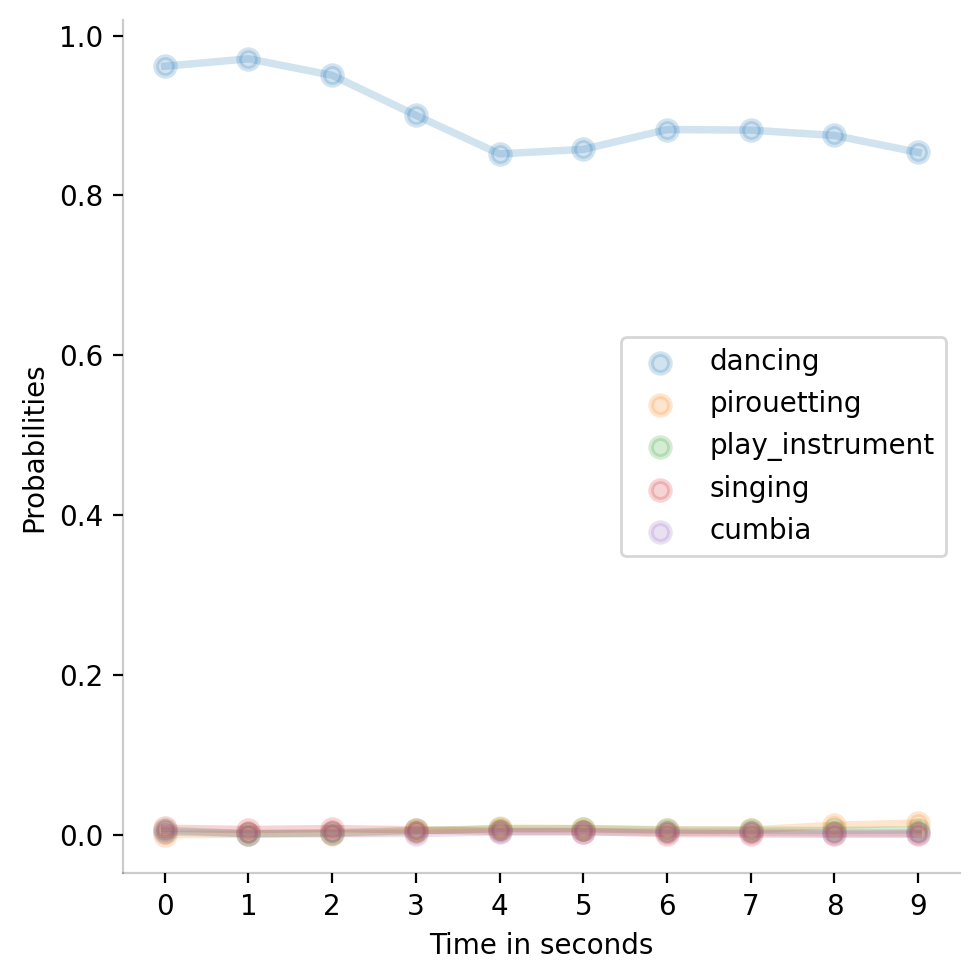

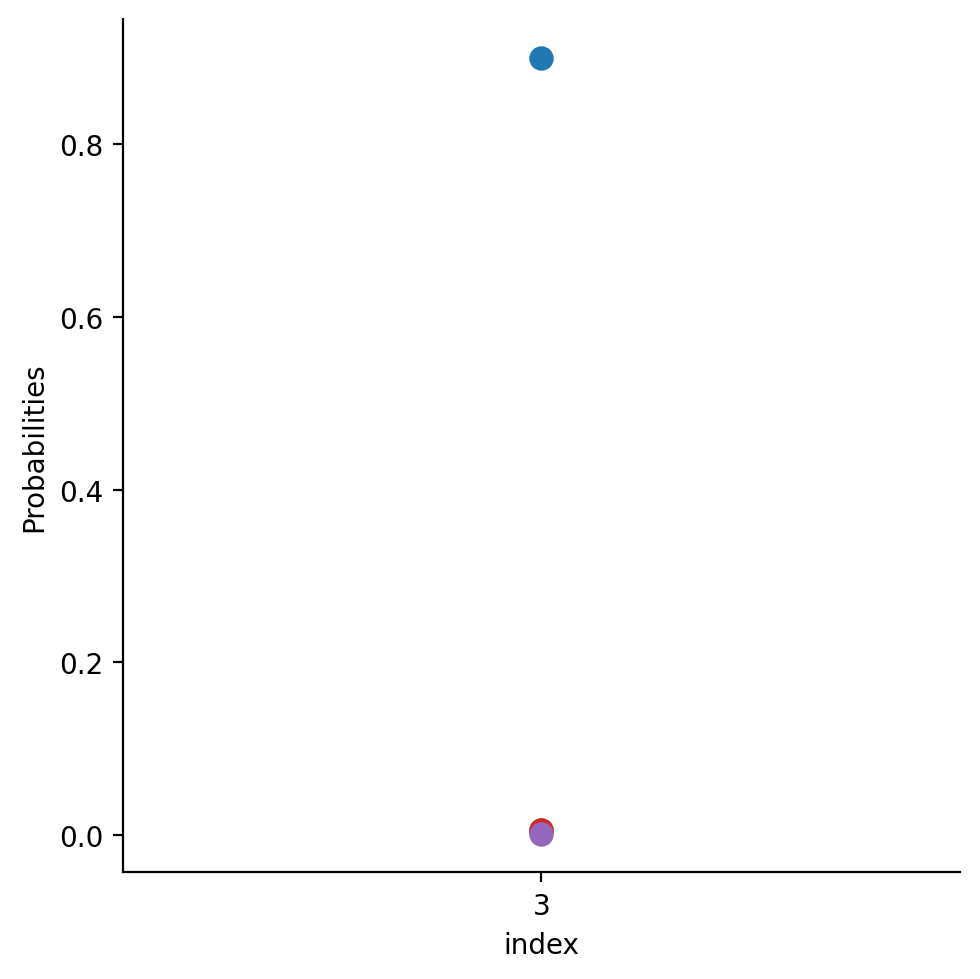

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


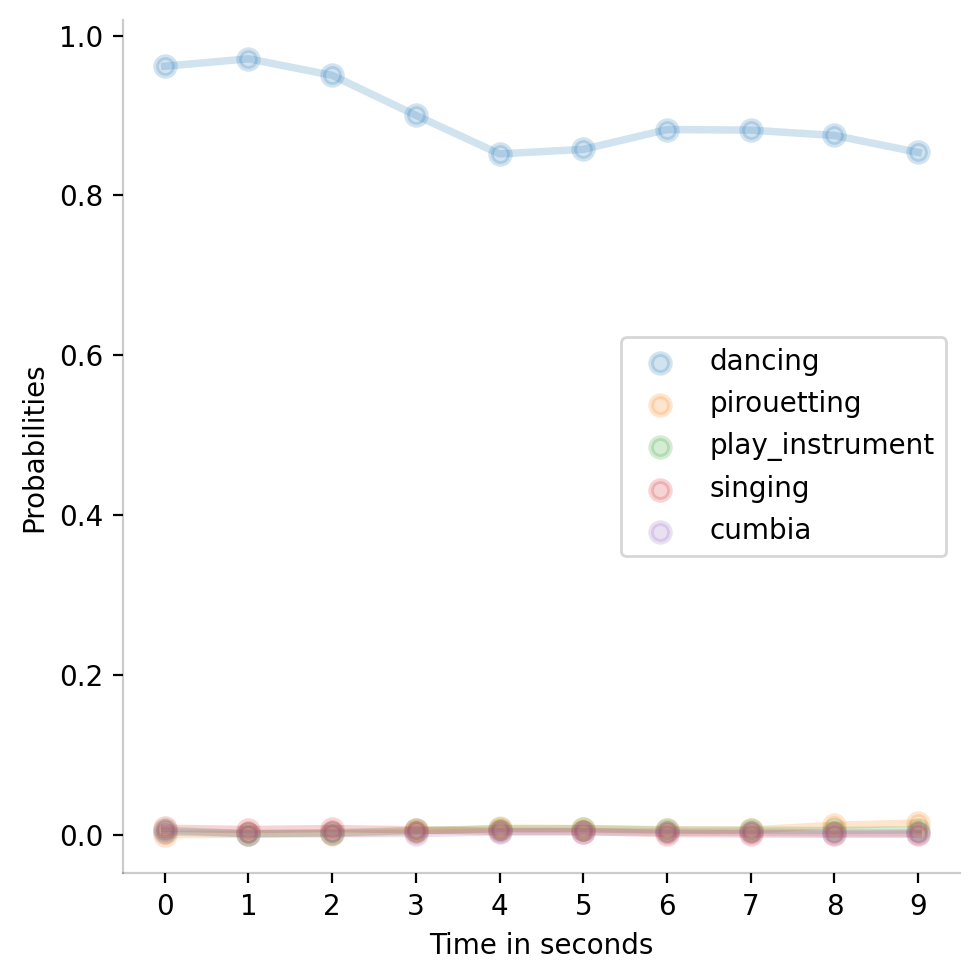

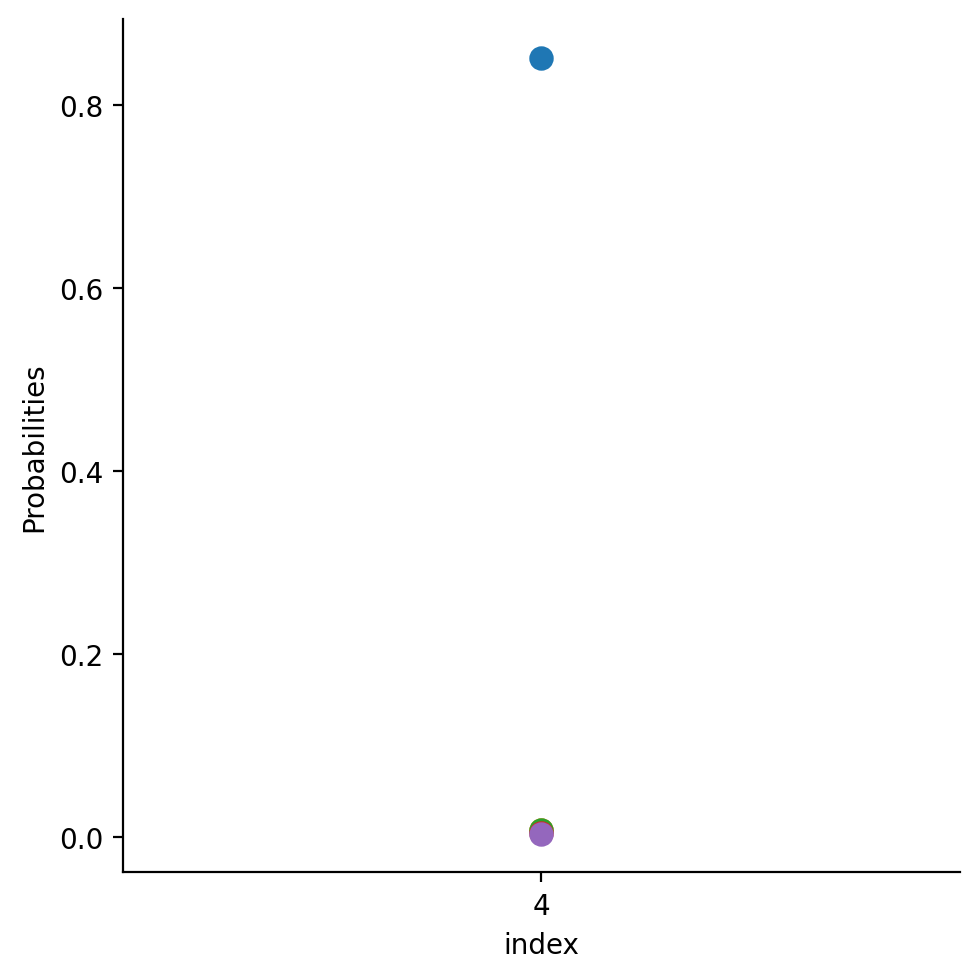

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


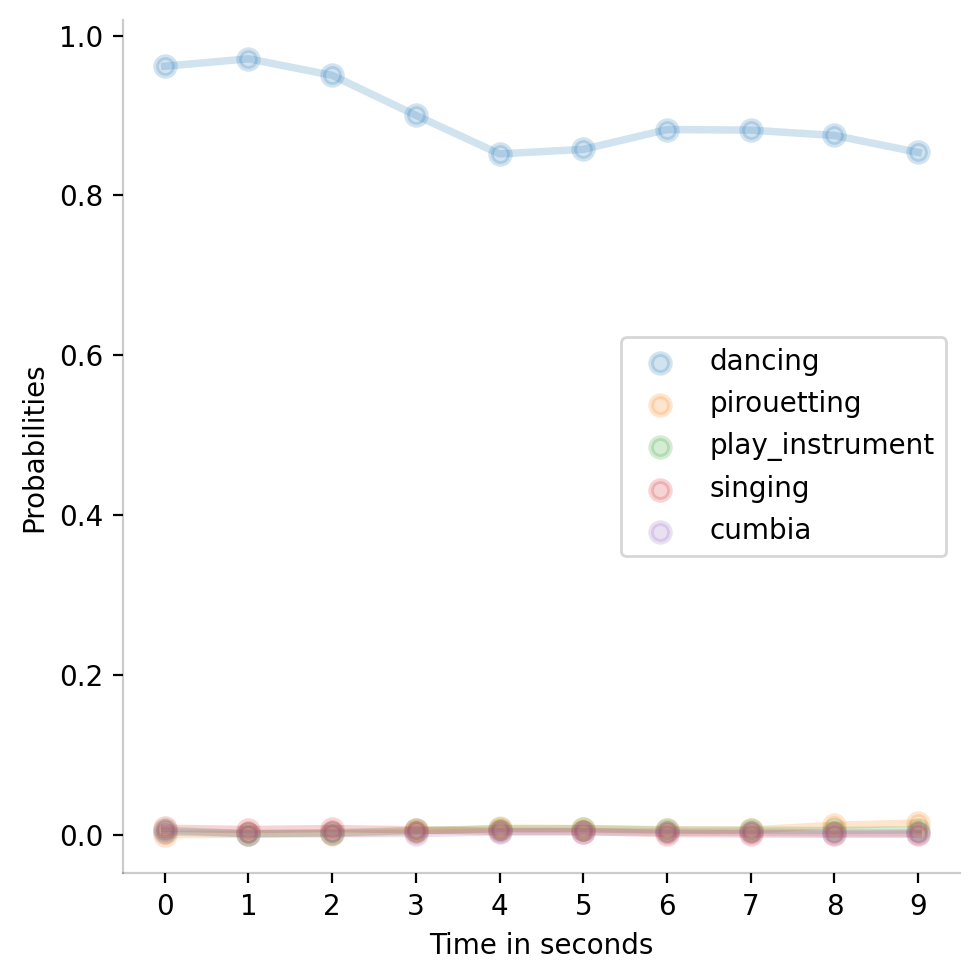

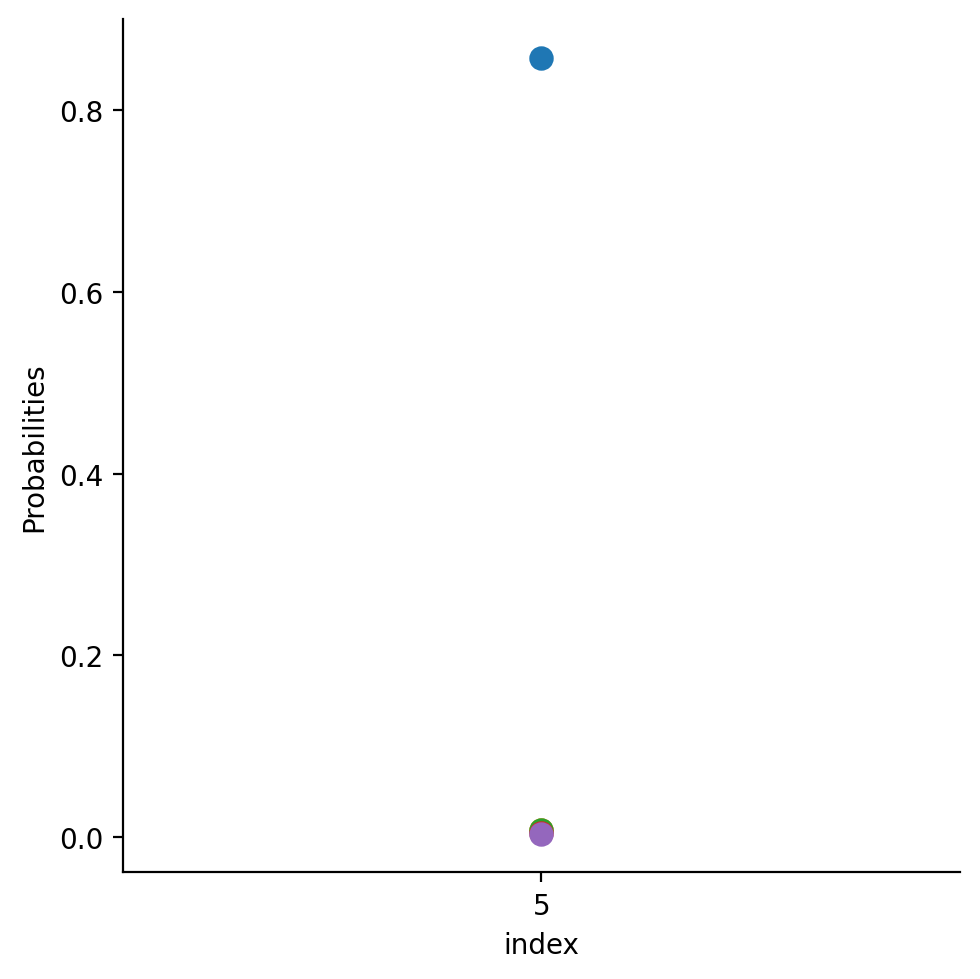

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


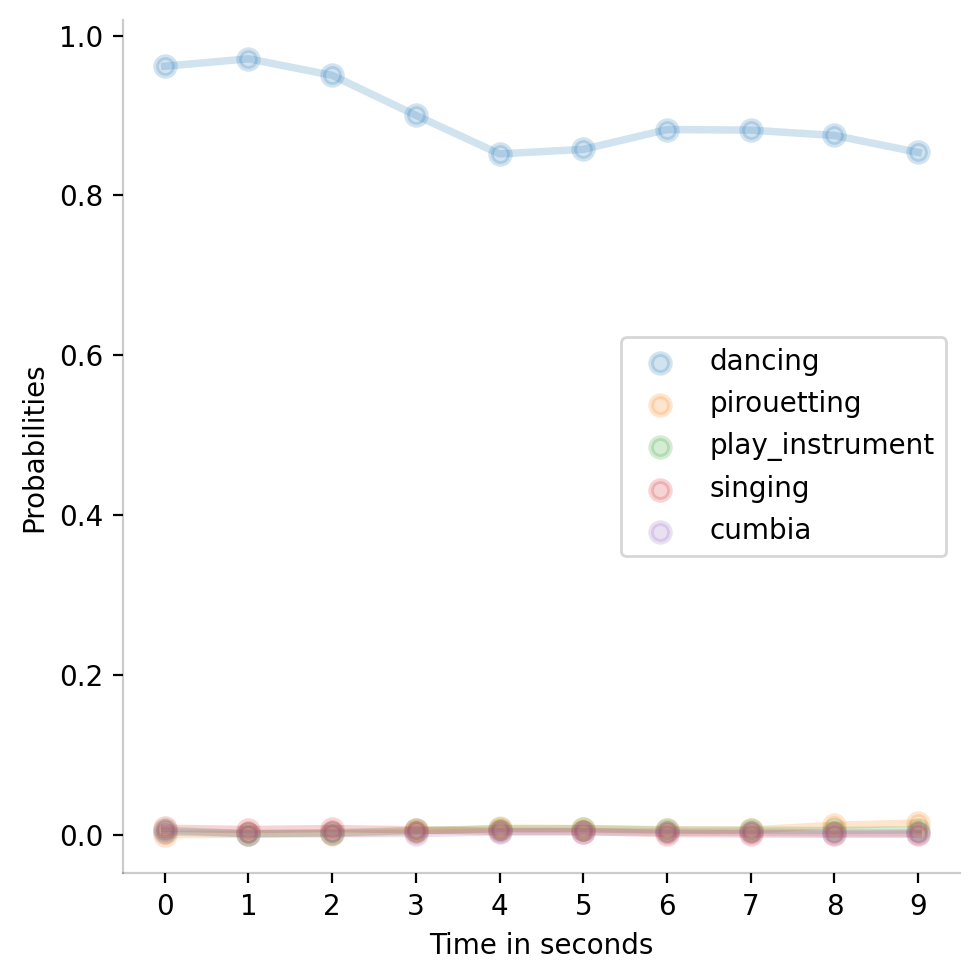

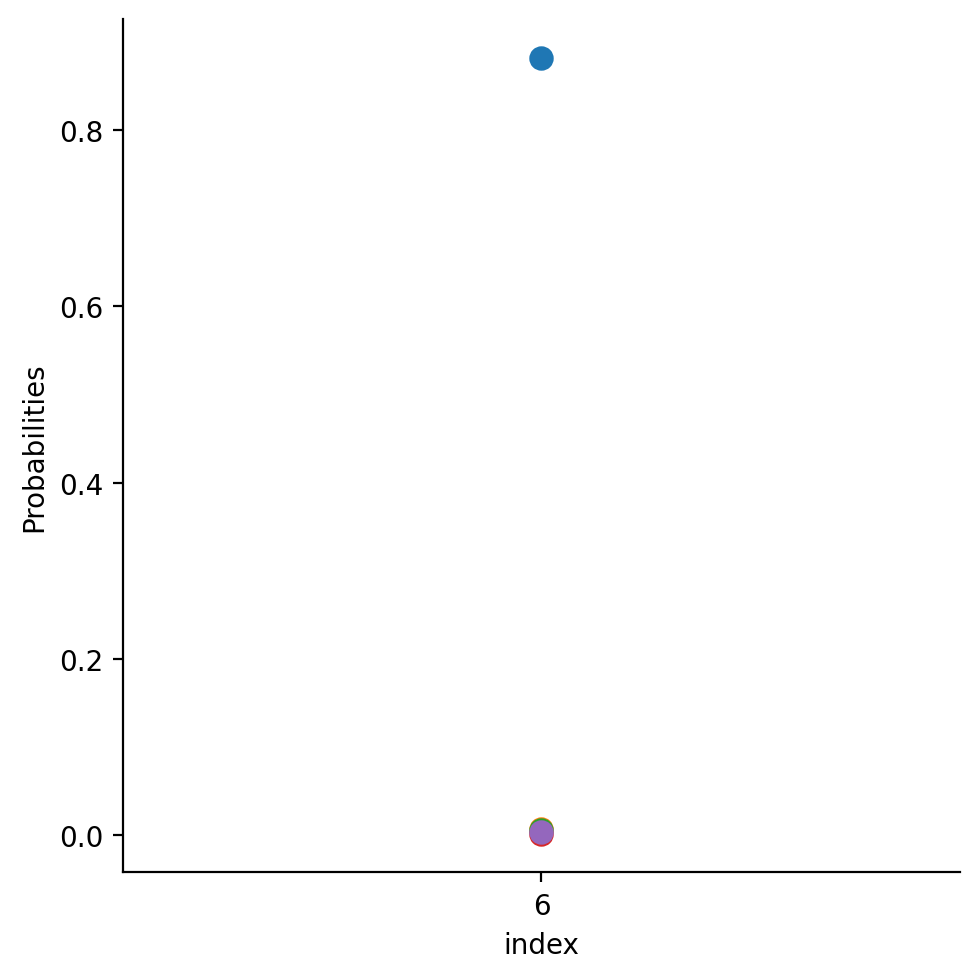

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


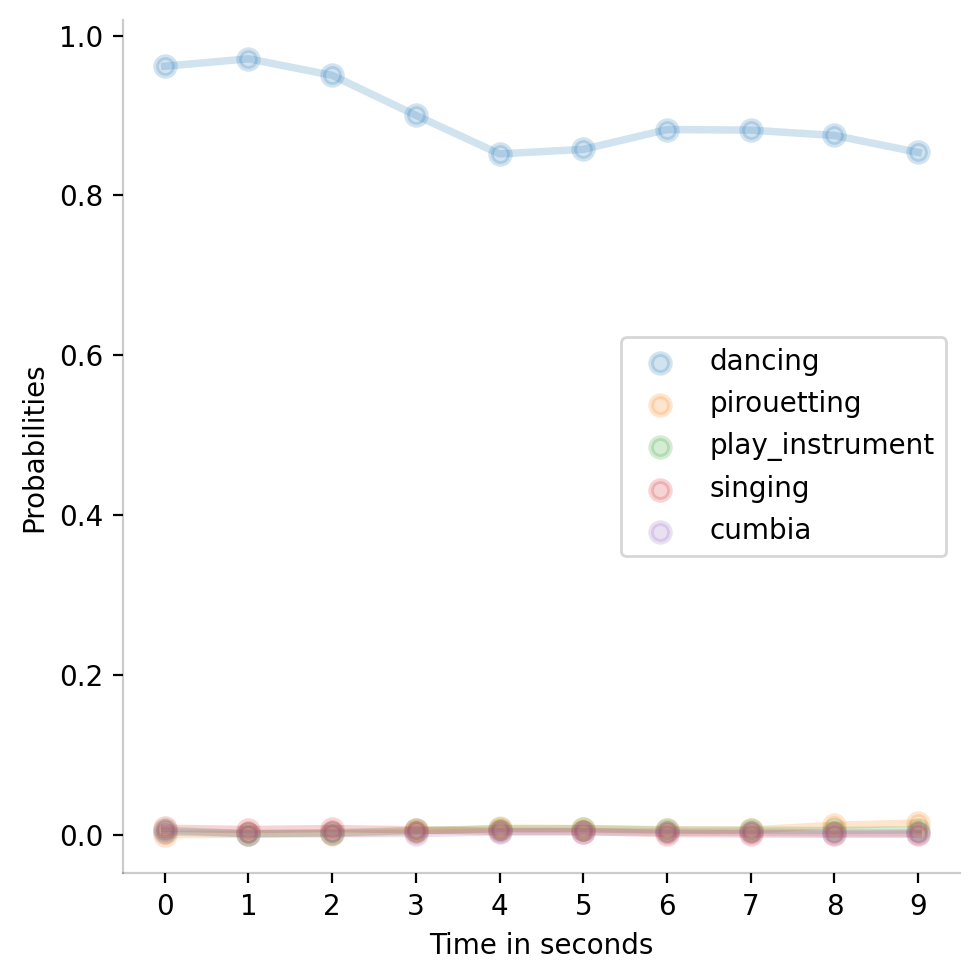

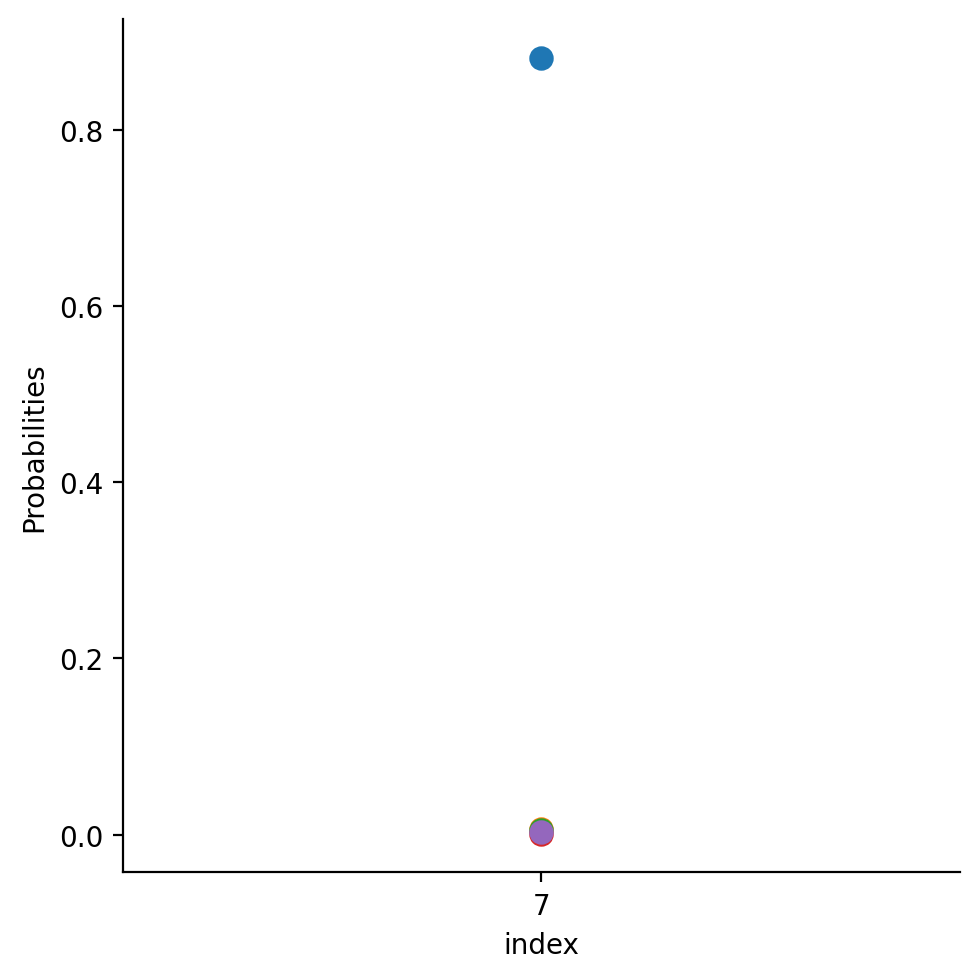

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


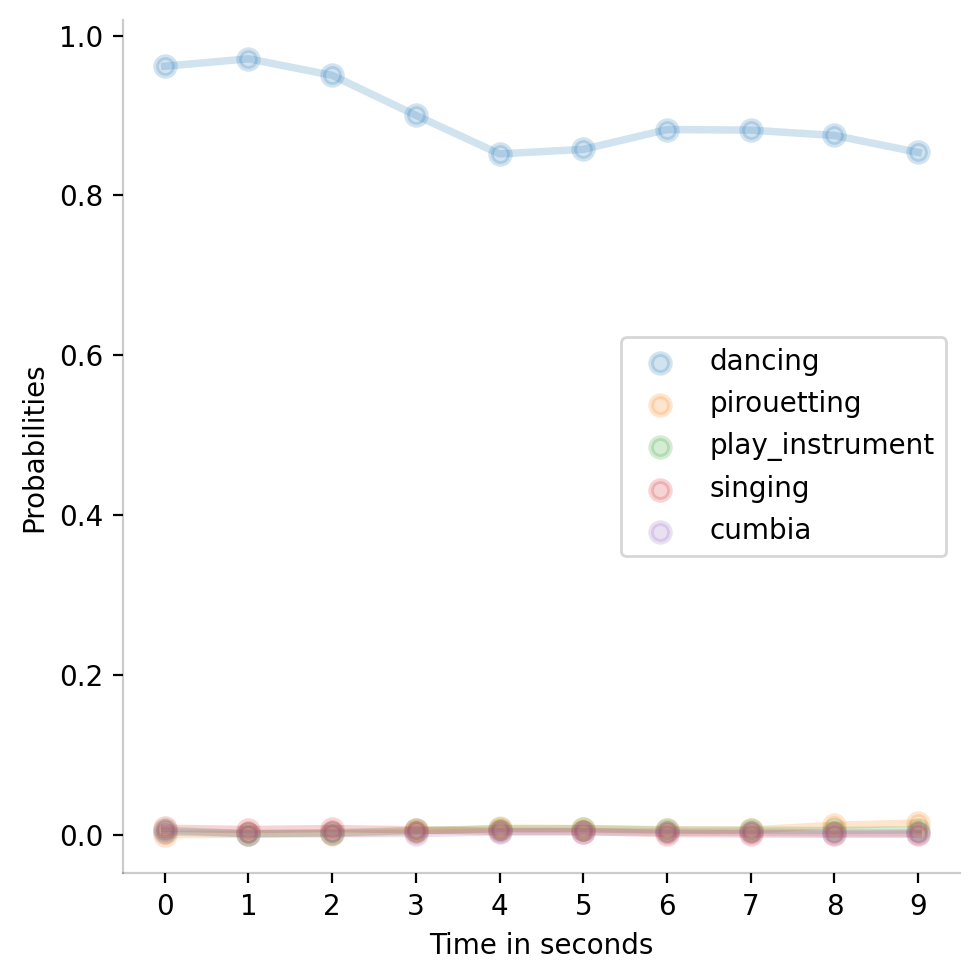

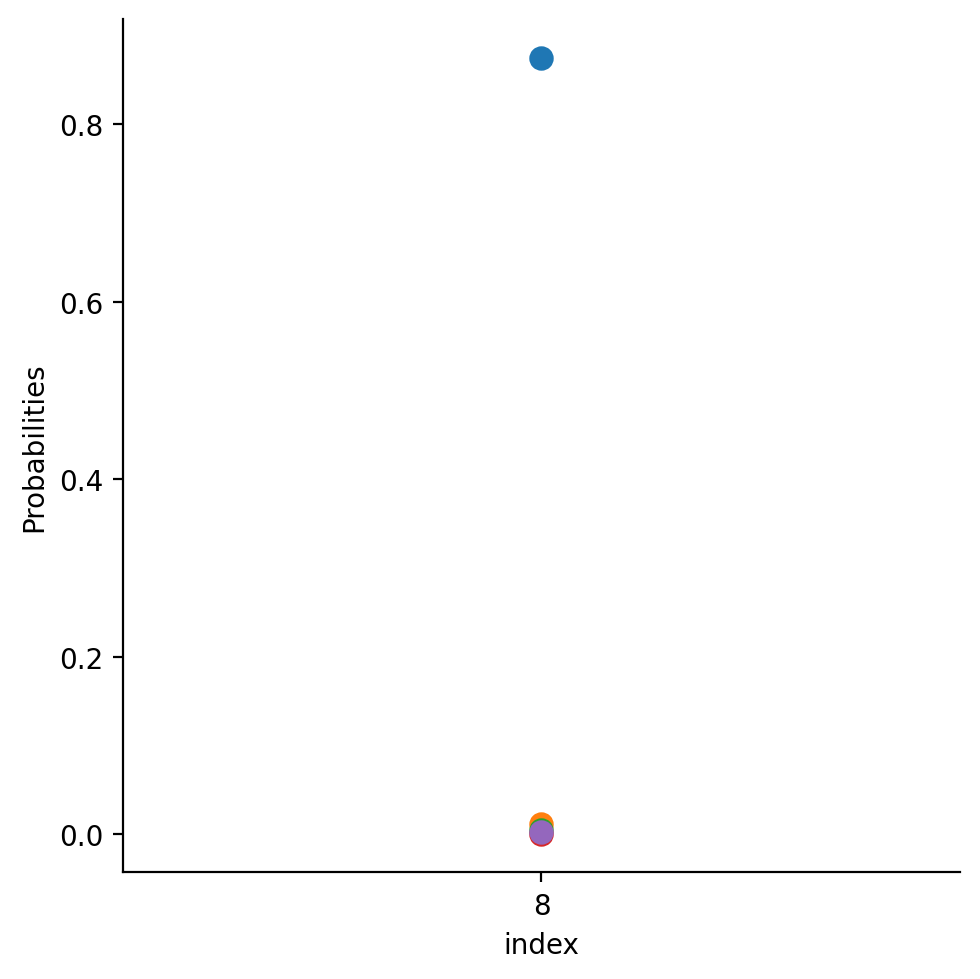

c:\Users\Aaron\anaconda3\envs\deepsort\lib\site-packages\seaborn\categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


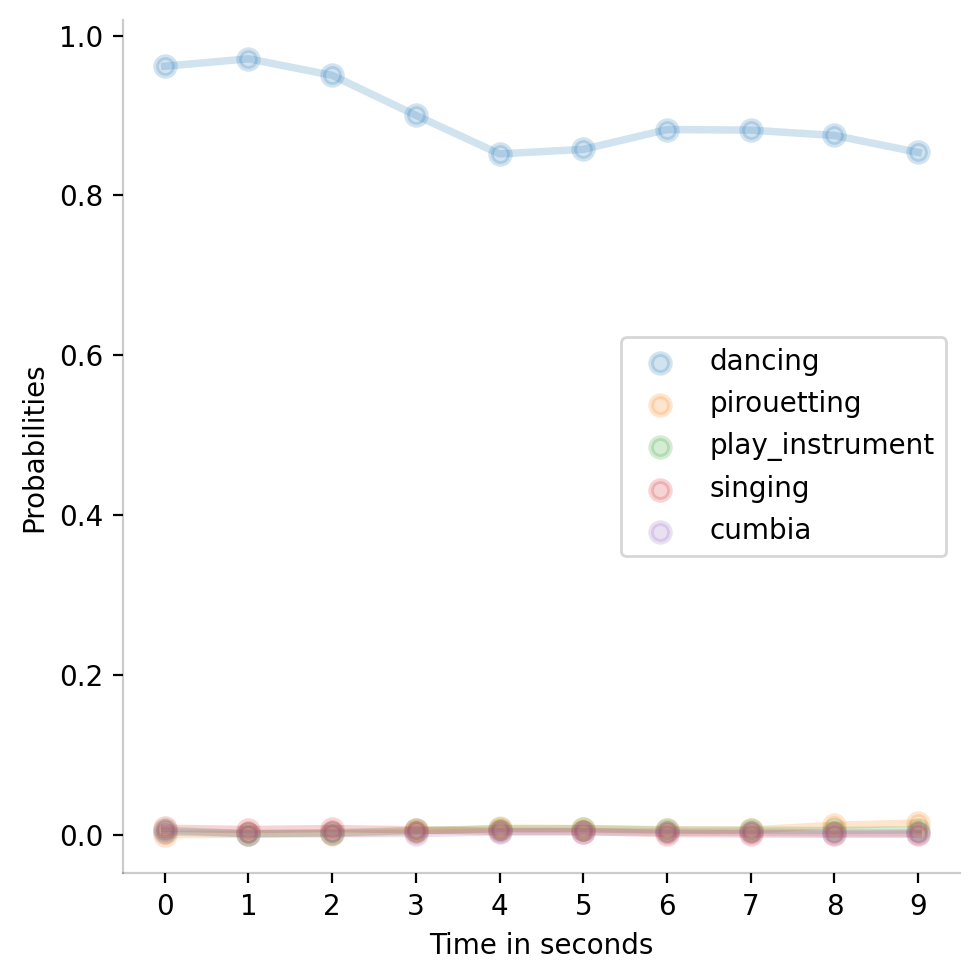

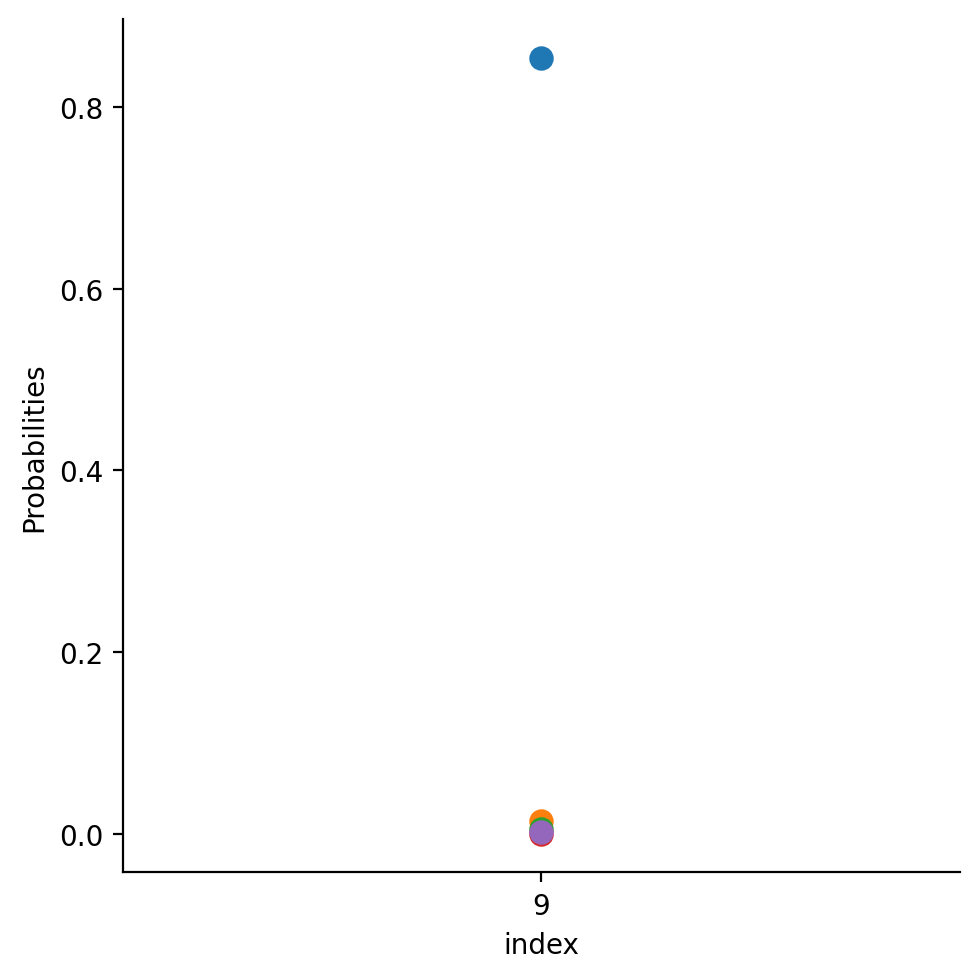

In [33]:
for df_time, df in df_out.groupby('index'):
    g = sns.catplot(x="index", y="Probabilities", hue='cols', data=df_out, kind='point',legend=False)
    #plt.setp(g.collections, alpha=.3) #for the markers
    plt.setp([g.ax.get_children()[0],g.ax.get_children()],alpha=.2)
    plt.xlabel('Time in seconds')
    plt.legend()

    sns.catplot(x="index", y="Probabilities",ax=plt.gca() ,hue='cols', data=df, kind='point',legend=False)
    plt.show()


In [20]:


for df_time, df in df_out.groupby('index'):
    print(df_time)

0
1
2
3
4
5
6
7
8
9


In [19]:
df_out

,index,cols,Probabilities
0,0,dancing,0.961603
1,1,dancing,0.970946
2,2,dancing,0.950257
3,3,dancing,0.900195
4,4,dancing,0.851937
5,5,dancing,0.857613
6,6,dancing,0.882376
7,7,dancing,0.881698
8,8,dancing,0.874982
9,9,dancing,0.853811


In [8]:
L = tracker.create_person_subclip(vid,df1.loc[0:299],aspect_ratio_max=0.5)
input = torch.Tensor(np.array(L[0:299])).permute(3, 0, 1, 2)
df_out = m.analyse_vid(input, 30, return_df=True, show_plot=True)

NameError: name 'tracker' is not defined

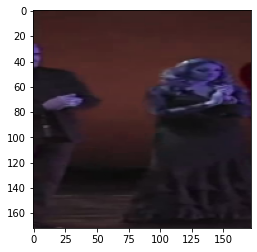

In [90]:
plt.imshow(L[220])

In [72]:
input = torch.Tensor(np.array(L[0:299])).permute(3, 0, 1, 2)

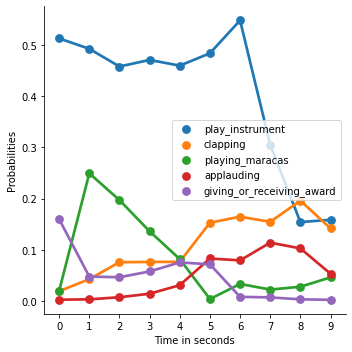

In [73]:
df = m.analyse_vid(input, 30, return_df=True, show_plot=True)

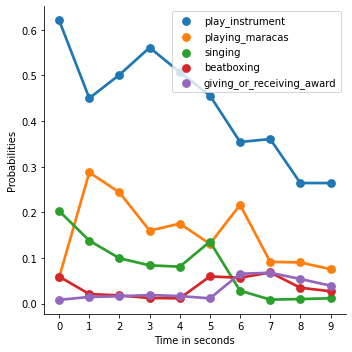

In [65]:
m = ModelInference(batch_size=5,n_frames_skip=6,reset_buffer_every_n_batches=5)
df = m.analyse_vid(input, 30, return_df=True, show_plot=True)

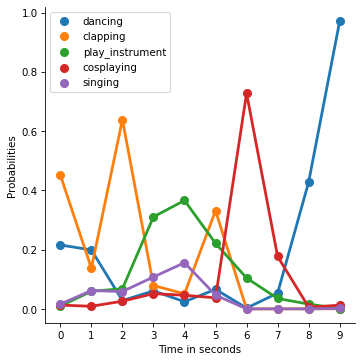

In [32]:
m = ModelInference(batch_size=5,n_frames_skip=6,reset_buffer_every_n_batches=1)
df = m.analyse_vid(input, 30, return_df=True, show_plot=True)

In [ ]:
def run_pipeline(video_path,out_fname):
    video,fps = loader.load_video_for_detection(video_path)
    L = viz.get_predictions_every_n_seconds(video, int(fps), n_seconds=1)
    plt.imshow(L[0])
    
    out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), int(fps), (L[0].shape[1], L[0].shape[0]))
    for frame in L:
        out.write(frame[:,:,::-1])

    out.release()
    return L

In [ ]:
visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),torch.Tensor(np.array(predictions)), predicted_boxes.long(),text_alpha = 0.2)

In [41]:
from visualization import VideoVisualizer


In [ ]:
L = []
n_seconds = 1
fps = 30
for i in range(0,video.shape[1],int(n_seconds*fps)):
    subvid = video[:,i:i+fps,:,:]
    predictions = []
    if len(predicted_boxes)<1:
        predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
    for bbox in predicted_boxes:
        out = self.initialized_loader.pad_video(subvid,bbox.long())
        predictions.append(self.initialized_model.get_preds(out, 30))
    
    for frame in range(subvid.shape[1]):
        out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
        torch.Tensor(np.array(predictions)), 
        predicted_boxes.long(),text_alpha = 0.2)
        L.append(out_img_pred)

In [68]:
predicted_boxes

tensor([[ 10.,  10., 100., 100.]])

In [71]:
df1

,frame_number,person_id,x0,y0,width,height,rolling_x0,rolling_y0,rolling_width,rolling_height,is_imputed
0,0,1,568,193,150,489,568,193,150,489,1
1,1,1,568,193,150,489,568,193,150,489,1
2,2,1,568,193,150,489,568,193,150,489,1
3,3,1,568,193,150,489,568,193,150,489,0
4,4,1,569,193,152,485,568,193,151,487,0
...,...,...,...,...,...,...,...,...,...,...,...
296,296,1,579,158,152,517,524,153,173,512,0
297,297,1,582,157,155,524,527,154,173,512,0
298,298,1,585,157,153,527,530,154,172,513,0
299,299,1,586,158,154,527,532,155,172,513,0


In [73]:
def from_df_to_bbox(df):
    L= []
    for rolling_x0,	rolling_y0,	rolling_width,	rolling_height in df.loc[:,['rolling_x0',	'rolling_y0',	'rolling_width',	'rolling_height']].values:
        L.append([rolling_x0,rolling_y0,rolling_x0+rolling_width,rolling_y0+rolling_height])
    return L
    

In [74]:
bboxes = from_df_to_bbox(df1)

In [90]:
L = []
n_seconds = 1
fps = 30
for i in range(0,video.shape[1]):
    out_img_pred = viz.visualizer.draw_one_frame(np.array(video[:,i,:,:].permute(1,2,0)).astype(int),
    torch.Tensor(np.array(df)), 
    torch.Tensor(([bboxes[i]])).long(),text_alpha = 0.2)
    L.append(out_img_pred)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [1]:
import streamlit as st


def load_image():
    uploaded_file = st.file_uploader(label='Pick an video to test')
    if uploaded_file is not None:
        image_data = uploaded_file.getvalue()
        st.image(image_data)


In [ ]:
st.video()

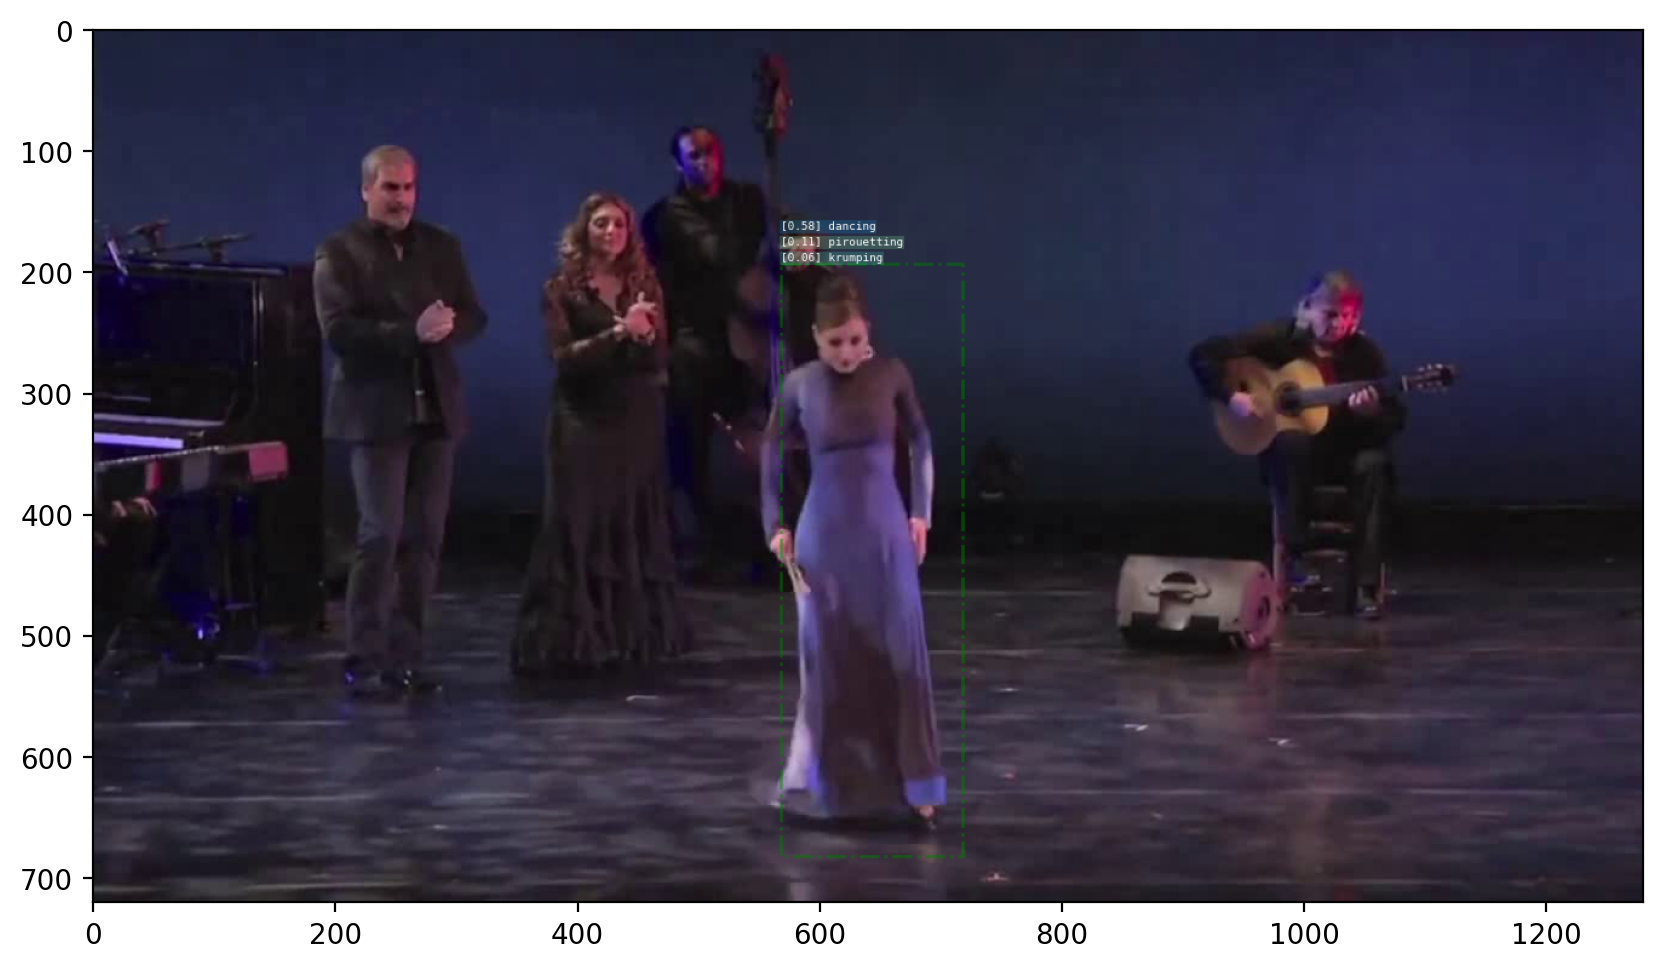

In [87]:
plt.imshow(L[0])

In [92]:
out_fname = 'improved_tracking_imputation.avi'
out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), 30, (1280, 720))
n_frame = 0
plt.ioff()

for frame in L:
    out.write(frame)
    # finally:
    #     out.release()

out.release()

In [80]:
L = []
n_seconds = 1
fps = 30
predicted_boxes = torch.Tensor([[10,10,100,100]])
for i in range(0,video.shape[1],int(n_seconds*fps)):
    subvid = video[:,i:i+fps,:,:]
    
    for frame in range(subvid.shape[1]):
        out_img_pred = viz.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
        torch.Tensor(np.array(df)), 
        predicted_boxes.long(),text_alpha = 0.2)
        L.append(out_img_pred)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [83]:
torch.Tensor(([bboxes[i]])).long()

tensor([[503, 144, 660, 636]])

In [81]:
predicted_boxes

tensor([[ 10.,  10., 100., 100.]])

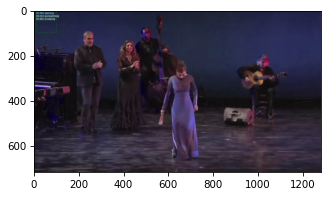

In [67]:
plt.imshow(L[10])

In [ ]:
def get_predictions_every_n_seconds(video, fps, n_seconds=1):
    L = []
    for i in range(0,video.shape[1],int(n_seconds*fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = self.initialized_detector.get_person_bboxes(subvid[:,int(subvid.shape[1]/2),:,:].permute(1,2,0))
        predictions = []
        if len(predicted_boxes)<1:
            predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
        for bbox in predicted_boxes:
            out = self.initialized_loader.pad_video(subvid,bbox.long())
            predictions.append(self.initialized_model.get_preds(out, 30))
        
        for frame in range(subvid.shape[1]):
            out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L

In [43]:
visualizer

NameError: name 'visualizer' is not defined

In [59]:
video.max()

tensor(255.)

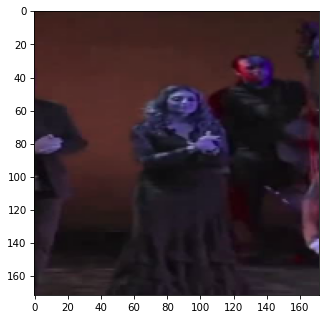

In [56]:
plt.imshow(L[0])

In [58]:
video.shape

torch.Size([3, 300, 720, 1280])

In [55]:
viz.visualizer.draw_one_frame(np.array(video[:,frame,:,:].permute(1,2,0).astype(int),)

<bound method VideoVisualizer.draw_one_frame of <visualization.VideoVisualizer object at 0x7fcd9f92b748>>

In [54]:
viz.visualizer.draw_one_frame(, preds,   bboxes, alpha = 0.5)

NameError: name 'frame' is not defined

In [ ]:
def get_predictions_every_n_seconds(self,video, fps, n_seconds=1):
    L = []
    for i in range(0,video.shape[1],int(n_seconds*fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = self.initialized_detector.get_person_bboxes(subvid[:,int(subvid.shape[1]/2),:,:].permute(1,2,0))
        predictions = []
        if len(predicted_boxes)<1:
            predicted_boxes = torch.Tensor([0,0,video.shape[2],video.shape[3]]).reshape(1,4)
        for bbox in predicted_boxes:
            out = self.initialized_loader.pad_video(subvid,bbox.long())
            predictions.append(self.initialized_model.get_preds(out, 30))
        
        for frame in range(subvid.shape[1]):
            out_img_pred = self.visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L

In [66]:
from visualization import VideoVisualizer

visualizer = VideoVisualizer(600, m.class_id_dict, top_k=2, mode="top-k")

In [67]:

out_img_pred = visualizer.draw_one_frame(np.array(video[:,0,:,:].permute(1,2,0)).astype(int), torch.Tensor(m.get_preds(out, 30)), [predicted_boxes[1].long()])

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [21]:
torch.Tensor(m.get_preds(out, 30)).shape

torch.Size([513])

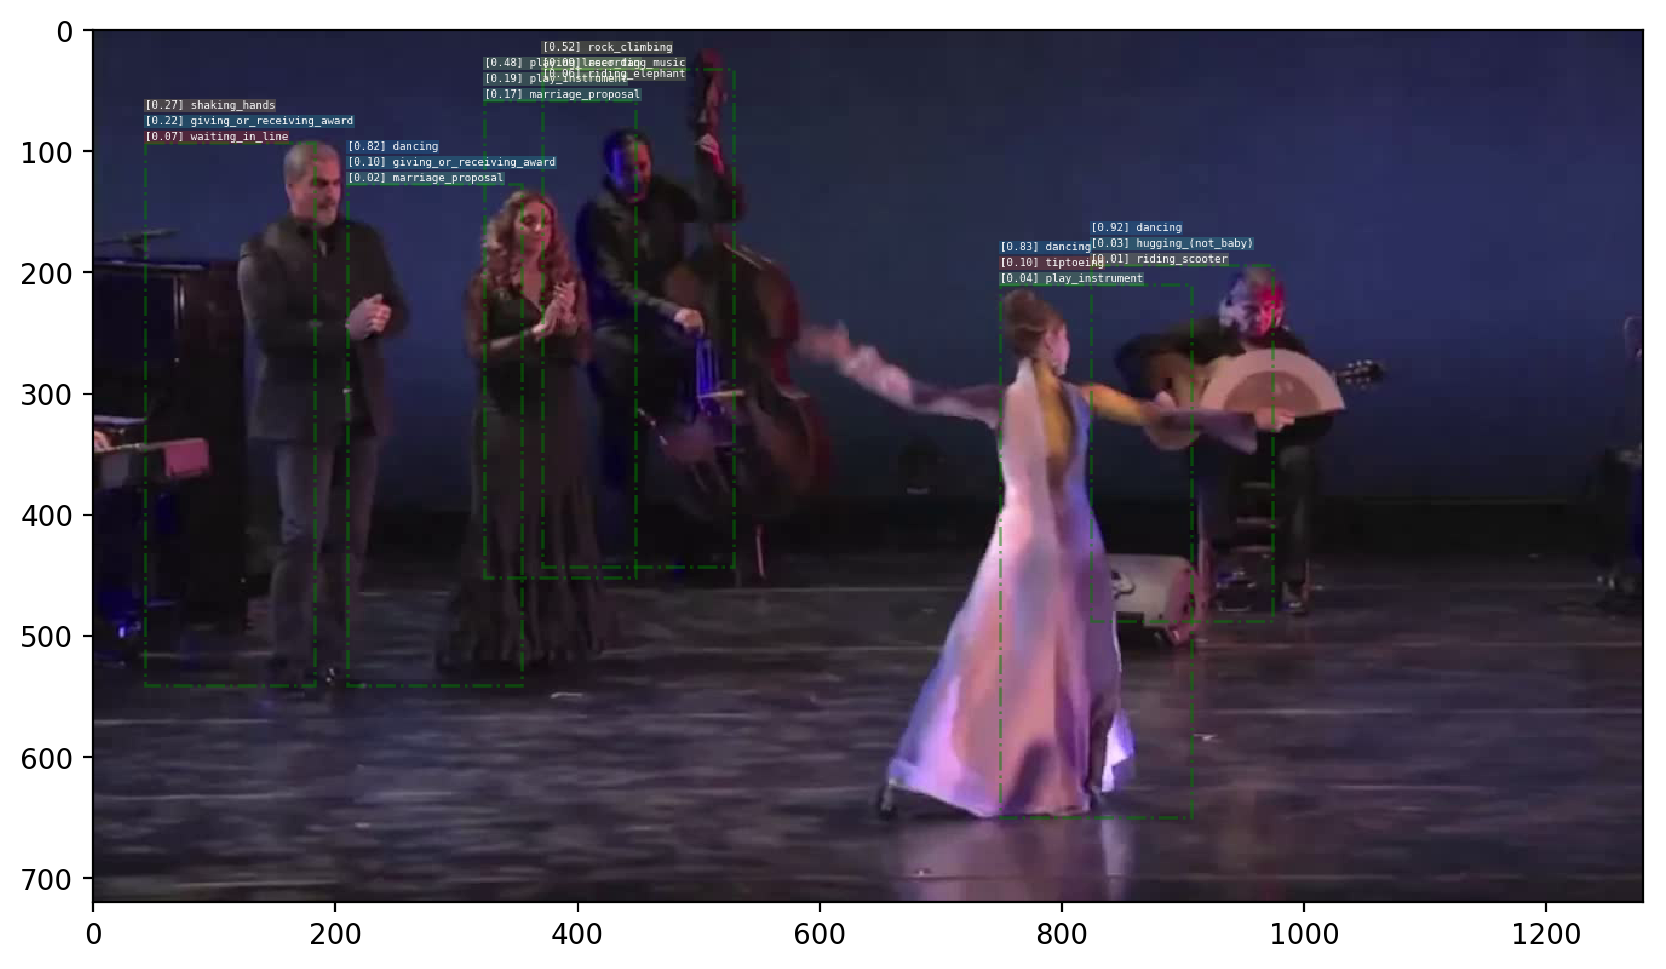

In [75]:
plt.imshow(L[180])

In [335]:
for i in range(0,video.shape[1],int(fps)):
    print(i)

0
30
60
90
120
150
180
210
240
270


In [365]:
def get_predictions(video, fps):
    L = []
    for i in range(0,video.shape[1],int(fps)):
        subvid = video[:,i:i+fps,:,:]
        predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))
        predictions = []
        for bbox in predicted_boxes:
            out = loader.pad_video(subvid,bbox.long())
            predictions.append(m.get_preds(out, 30))
        
        for frame in range(fps):
            out_img_pred = visualizer.draw_one_frame(np.array(subvid[:,frame,:,:].permute(1,2,0)).astype(int),
            torch.Tensor(np.array(predictions)), 
            predicted_boxes.long(),text_alpha = 0.2)
            L.append(out_img_pred)
    return L
    #return torch.Tensor(np.array(predictions))


In [25]:
video.shape

torch.Size([3, 300, 720, 1280])

In [68]:
from Visualizer import Visualizer

In [94]:
from Visualizer import Visualizer
viz = Visualizer(initialized_model=m,
                initialized_detector=det,
                initialized_loader=loader)



NameError: name 'det' is not defined

In [70]:
L = viz.get_predictions_every_n_seconds( video, 30, n_seconds=1)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]
/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [314]:
i=0
fps=30
subvid = video[:,i*int(fps):(i+1)*int(fps),:,:]


In [329]:
video.shape

torch.Size([3, 300, 720, 1280])

In [366]:
L = get_predictions(video, fps)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]
/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [10]:
L[0].shape

NameError: name 'L' is not defined

In [367]:
out_fname = 'annotated_vid.avi'
out = cv2.VideoWriter(out_fname,cv2.VideoWriter_fourcc(*'DIVX'), fps, (1280, 720))
n_frame = 0
plt.ioff()

for frame in L:
    out.write(frame)
    # finally:
    #     out.release()

out.release()

In [ ]:

    try:
        while n_frame<10:
            ret, frame = cap.read()
            if not ret:
                break
            frame = frame[y_1:y_1+height,x_1:x_1+width,:]
            frame = resize_with_pad(frame,(172,172)) 
            out.write(frame)
            n_frame +=1  

    finally:
        cap.release()
        out.release()

In [315]:
subvid.shape

torch.Size([3, 30, 720, 1280])

In [316]:
predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))


/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


In [47]:
i=0

In [48]:
subvid = video[:,i*int(fps):(i+1)*int(fps),:,:]
predicted_boxes = det.get_person_bboxes(subvid[:,int(fps/2),:,:].permute(1,2,0))
predictions = []
for bbox in predicted_boxes:
    out = loader.pad_video(subvid,bbox.long())
    predictions.append(m.get_preds(out, 30))

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


In [49]:
subvid.shape[1]/2

torch.Size([3, 29, 720, 1280])

In [318]:
predictions = []
for bbox in predicted_boxes:
    out = loader.pad_video(subvid,bbox.long())
    predictions.append(m.get_preds(out, 30))

In [304]:
fps

29.97002997002997

In [306]:
L = get_predictions(video, 30)

/cs/labs/buxi/aarono/detectron/lib/python3.7/site-packages/detectron2/structures/boxes.py:235: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  ../aten/src/ATen/native/IndexingUtils.h:28.)
  b = self.tensor[item]


IndexError: index 15 is out of bounds for dimension 1 with size 0

In [292]:

out_img_pred = visualizer.draw_one_frame(np.array(video[:,0,:,:].permute(1,2,0)).astype(int),
 torch.Tensor(np.array(predictions)), 
 predicted_boxes.long(),text_alpha = 0.2)

/cs/labs/buxi/aarono/ava_kinetics/separate_classes/visualization.py:334: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  num_text_top = dist_to_top // textbox_width


In [295]:
from visualization import VideoVisualizer

class Visualizer:
    def __init__(self, classes_dict, top_n=3):
        self.classes_dict = classes_dict
        self.top_n = top_n
        self.num_classes = len(classes_dict.keys())
        self.visualizer = VideoVisualizer(self.num_classes, self.classes_dict, top_k=3, mode="top-k")

    def foo(self, frame_list, preds_list, bbox_list):
        out_img_pred = self.visualizer.draw_one_frame(frame_list[0], preds_list, bbox_list)